# IPL Viewership And Ad Revenue Analysis

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


In [34]:
df=pd.read_csv("C:/Users/Anshul/Desktop/Ipl Viewership Analysis/ipl_viewership_ad_revenue_dataset.csv")

In [35]:
print(df.head())
print(df.info())

   Season Match_ID Team1 Team2      Venue  Attendance  Avg_Ticket_Price  \
0    2018  2018_M1   LSG    MI  Bangalore       46962               287   
1    2018  2018_M2  PBKS    GT    Chennai       44769               221   
2    2018  2018_M3    MI   SRH  Ahmedabad       55740              1040   
3    2018  2018_M4   CSK   SRH  Ahmedabad       42159              1142   
4    2018  2018_M5   RCB   CSK  Ahmedabad       31873               755   

   Ticket_Revenue  Viewership_TV  Viewership_Digital  Ad_Revenue  
0        13478094        7466659             1739911     9472471  
1         9893949        6183740             1807371    14305648  
2        57969600        3570406             3916664     8385659  
3        48145578        7397986             2370928     9155299  
4        24064115        1196769             3158505     6271741  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 11 columns):
 #   Column              Non-Null Count  D

## Business Requirements

### Attendance trend Per IPL Season

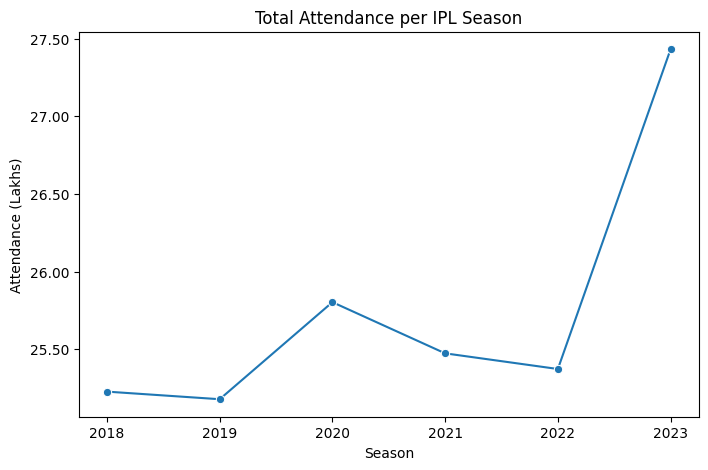

In [36]:
plt.figure(figsize=(8,5))
sns.lineplot(x=attendance_season.index, y=attendance_season.values/1_00_000, marker="o")
plt.title("Total Attendance per IPL Season")
plt.xlabel("Season"); plt.ylabel("Attendance (Lakhs)")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.show()

### Ticket Revenue trend

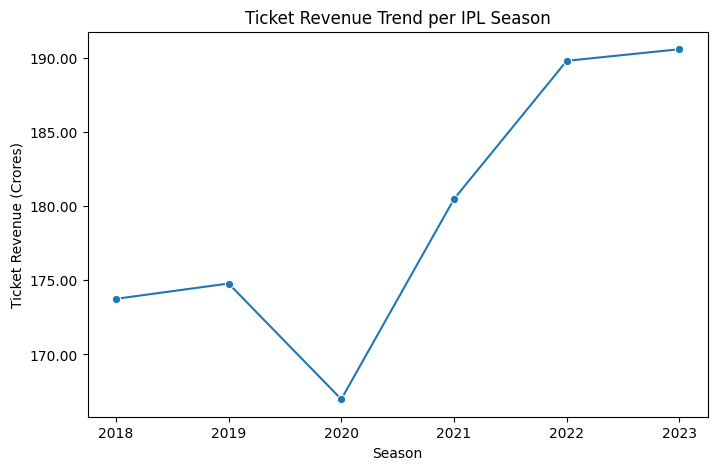

In [37]:
ticket_revenue_season = df.groupby("Season")["Ticket_Revenue"].sum()

plt.figure(figsize=(8,5))
sns.lineplot(
    x=ticket_revenue_season.index,
    y=ticket_revenue_season.values / 1_00_00_000,   
    marker="o"
)

plt.title("Ticket Revenue Trend per IPL Season")
plt.xlabel("Season")
plt.ylabel("Ticket Revenue (Crores)")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

plt.show()


### TV vs Digital Viewership Per IPL Season


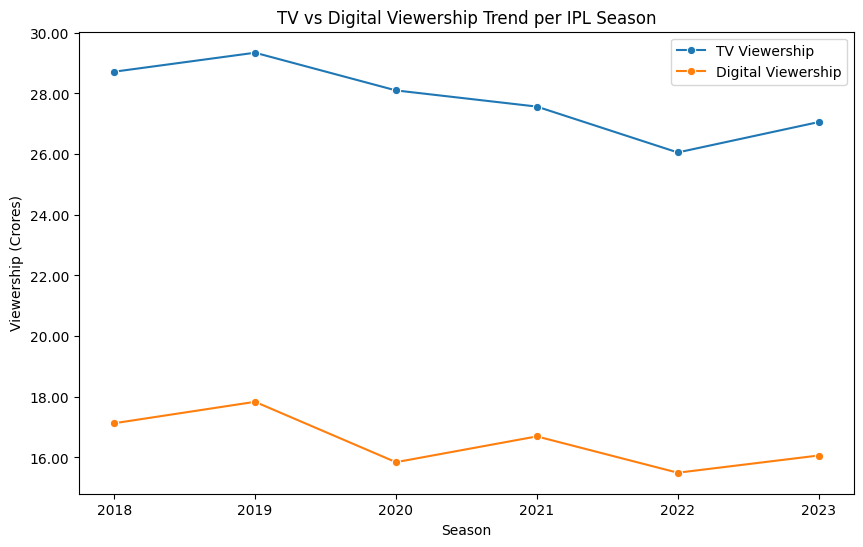

In [38]:

# Group TV and Digital Viewership by Season
viewership_trend = df.groupby("Season")[["Viewership_TV", "Viewership_Digital"]].sum()

plt.figure(figsize=(10,6))
sns.lineplot(
    x=viewership_trend.index,
    y=viewership_trend["Viewership_TV"] / 1_00_00_000, 
    marker="o",
    label="TV Viewership"
)

sns.lineplot(
    x=viewership_trend.index,
    y=viewership_trend["Viewership_Digital"] / 1_00_00_000,  
    marker="o",
    label="Digital Viewership"
)

plt.title("TV vs Digital Viewership Trend per IPL Season")
plt.xlabel("Season")
plt.ylabel("Viewership (Crores)")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

plt.legend()
plt.show()


### Average Attendance per Venue


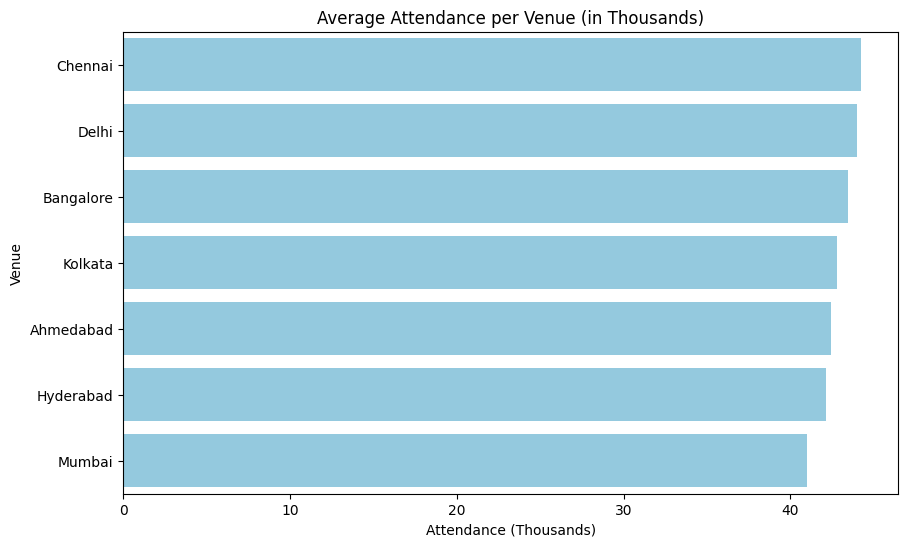

In [39]:
venue_attendance = df.groupby("Venue")["Attendance"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=venue_attendance.values/1000, y=venue_attendance.index, color="skyblue")

plt.title("Average Attendance per Venue (in Thousands)")
plt.xlabel("Attendance (Thousands)")
plt.ylabel("Venue")
plt.show()


### Total Ticket Revenue per Venue


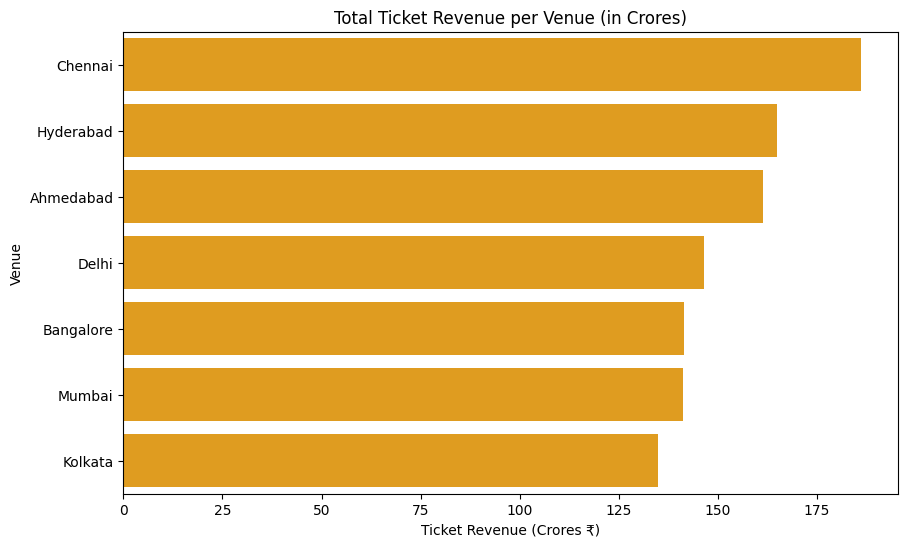

In [40]:
venue_revenue = df.groupby("Venue")["Ticket_Revenue"].sum().sort_values(ascending=False)

# Plot revenue in crores
plt.figure(figsize=(10,6))
sns.barplot(x=venue_revenue.values/1_00_00_000, y=venue_revenue.index, color="orange")

plt.title("Total Ticket Revenue per Venue (in Crores)")
plt.xlabel("Ticket Revenue (Crores ₹)")
plt.ylabel("Venue")
plt.show()


### Ad Revenue Trend Per IPL Season


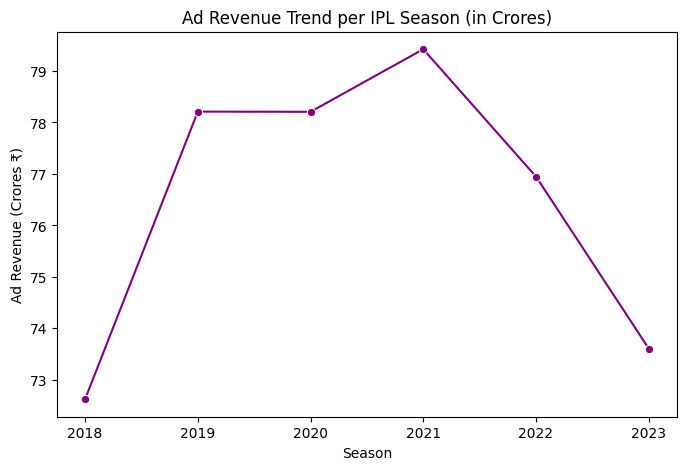

In [23]:
ad_revenue_season = df.groupby("Season")["Ad_Revenue"].sum()

plt.figure(figsize=(8,5))
sns.lineplot(x=ad_revenue_season.index, y=ad_revenue_season.values/1_00_00_000, marker="o", color="purple")

plt.title("Ad Revenue Trend per IPL Season (in Crores)")
plt.xlabel("Season")
plt.ylabel("Ad Revenue (Crores ₹)")
plt.show()


### Most Profitable Venue


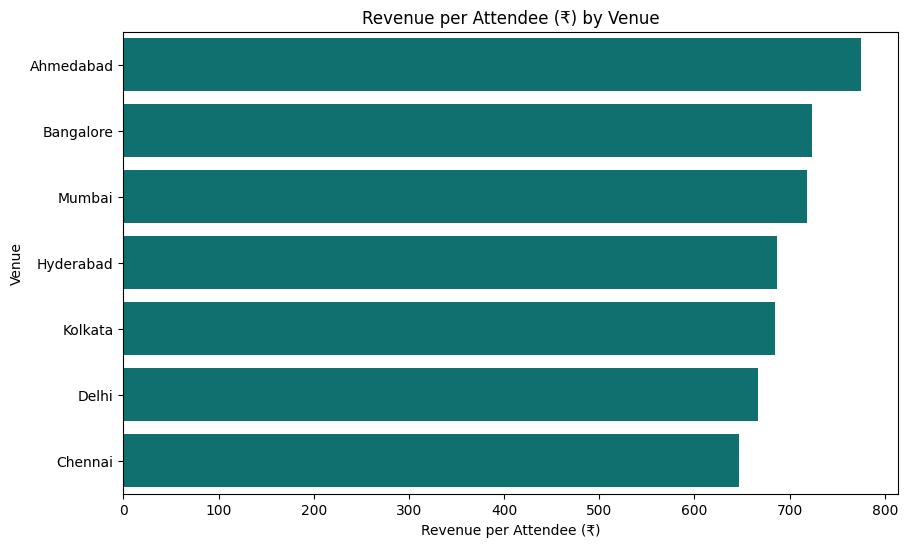

In [26]:
venue_profitability = (df.groupby("Venue")["Ticket_Revenue"].sum() / 
                       df.groupby("Venue")["Attendance"].sum()).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=venue_profitability.values, y=venue_profitability.index, color="teal")

plt.title("Revenue per Attendee (₹) by Venue")
plt.xlabel("Revenue per Attendee (₹)")
plt.ylabel("Venue")
plt.show()


### Correlation between Attendance and Ticket Revenue

Correlation between Attendance and Ticket Revenue: 0.36


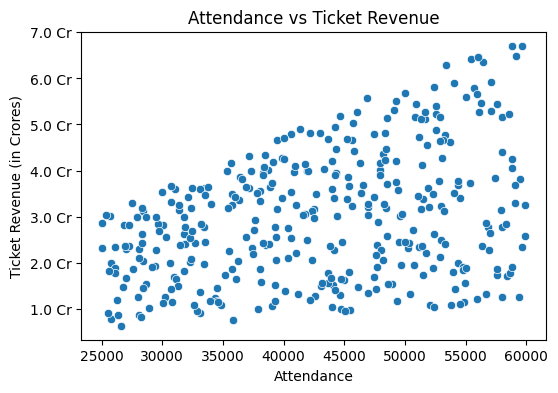

In [29]:
corr_value = df["Attendance"].corr(df["Ticket_Revenue"])
print(f"Correlation between Attendance and Ticket Revenue: {corr_value:.2f}")

# Scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(x="Attendance", y="Ticket_Revenue", data=df)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-7:.1f} Cr'))

plt.title("Attendance vs Ticket Revenue")
plt.xlabel("Attendance")
plt.ylabel("Ticket Revenue (in Crores)")
plt.show()



 **Since it's correlation is 0.36 so There is a moderate positive relationship between attendance and ticket revenue.As attendance increases, ticket revenue tends to increase too, but not very strongly.Other factors like ticket pricing, venue, or match importance also influence revenue  not just attendance**.

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Match_ID', y='Avg_Ticket_Price', data=df, color='yellow')
plt.title('Average Ticket Price per Match')
plt.xlabel('Match ID')
plt.ylabel('Avg Ticket Price')
plt.xticks(rotation=45)
plt.show()

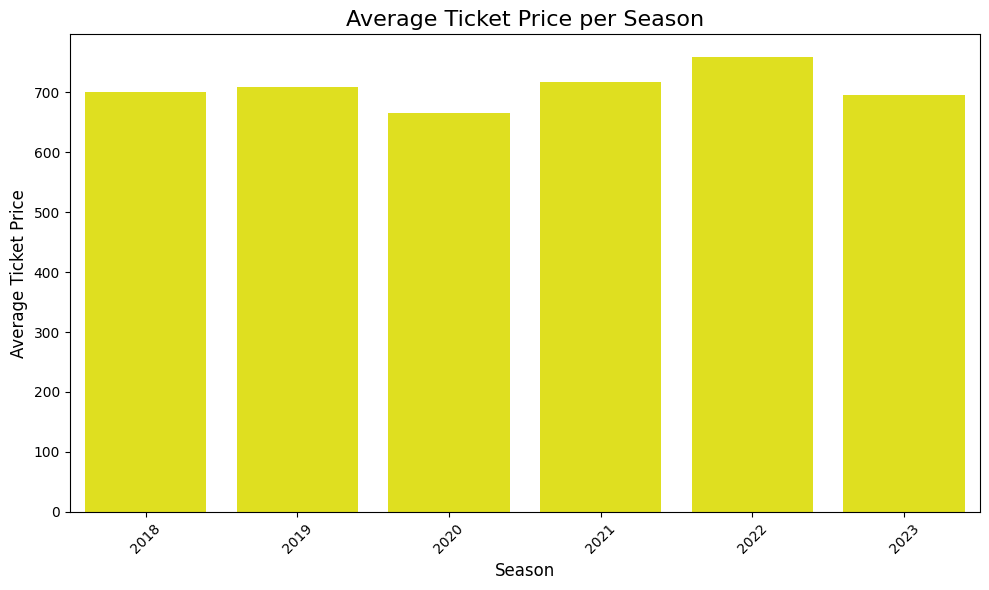

In [41]:
# Group by Season and calculate average ticket price
avg_ticket_price = df.groupby('Season')['Avg_Ticket_Price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=avg_ticket_price, x='Season', y='Avg_Ticket_Price', color='yellow')
plt.title('Average Ticket Price per Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Ticket Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 ### Top Matches Driving Revenue, Attendance, and Viewership



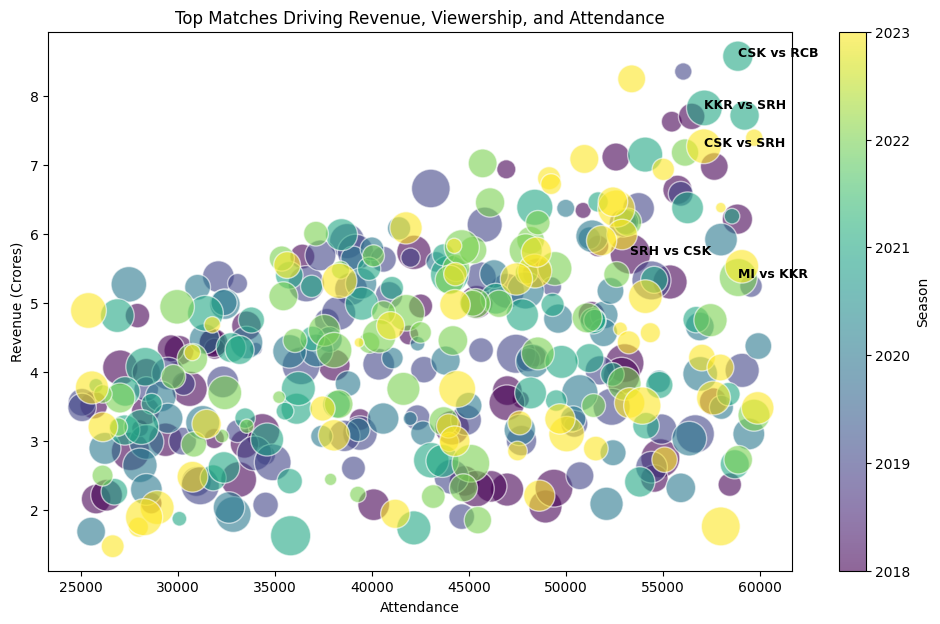


Top 10 Matches Overall:

 Season Match_ID Team1 Team2     Venue  Attendance  Revenue_Cr  Total_Viewership  Match_Score
   2021  2021_M3   KKR   SRH    Mumbai       57125    7.820864          10481685     0.861081
   2021 2021_M13   CSK   RCB   Chennai       58848    8.569626           7965673     0.834907
   2023 2023_M54   CSK   SRH     Delhi       57101    7.265831           9966216     0.818829
   2018 2018_M29   SRH   CSK Hyderabad       53312    5.707078          12975667     0.802452
   2022 2022_M57    MI   KKR   Chennai       58872    5.365098          11678623     0.799442
   2021 2021_M52   RCB    GT Bangalore       54075    7.145251          10126509     0.789180
   2021 2021_M10    DC  PBKS     Delhi       59196    7.710816           7583091     0.786052
   2023 2023_M15    DC    GT     Delhi       52586    6.363453          11205091     0.771574
   2019 2019_M44  PBKS   KKR     Delhi       54398    5.323055          12159631     0.769554
   2023 2023_M57   LSG   CSK Hyder

In [45]:
df["Total_Revenue"] = df["Ticket_Revenue"] + df["Ad_Revenue"]
df["Revenue_Cr"] = df["Total_Revenue"] / 1e7   # Convert to crores
df["Total_Viewership"] = df["Viewership_TV"] + df["Viewership_Digital"]

#Min-Max Normalization ---
for col in ["Revenue_Cr", "Attendance", "Total_Viewership"]:
    df[f"{col}_norm"] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

 #Match Score ---
df["Match_Score"] = df[["Revenue_Cr_norm", "Attendance_norm", "Total_Viewership_norm"]].mean(axis=1)
top_matches = df.nlargest(5, "Match_Score")

 #Bubble Chart ---
plt.figure(figsize=(12,7))
scatter = plt.scatter(
    df["Attendance"], df["Revenue_Cr"],
    s=df["Total_Viewership_norm"] * 800 + 50,  
    c=df["Season"], cmap="viridis", alpha=0.6, edgecolors="w"
)

# top 5 matches with labels
for i, row in top_matches.iterrows():
    plt.text(
        row["Attendance"], row["Revenue_Cr"],
        f"{row['Team1']} vs {row['Team2']}",
        fontsize=9, weight="bold", color="black"
    )

plt.colorbar(scatter, label="Season")
plt.xlabel("Attendance")
plt.ylabel("Revenue (Crores)")
plt.title("Top Matches Driving Revenue, Viewership, and Attendance")
plt.show()

#Display Top Matches Table ---
print("\nTop 10 Matches Overall:\n")
print(df.nlargest(10, "Match_Score")[[
    "Season","Match_ID","Team1","Team2","Venue",
    "Attendance","Revenue_Cr","Total_Viewership","Match_Score"
]].to_string(index=False))


**“Normalized the data using Min-Max scaling so that attendance, revenue, and viewership are on the same scale (0–1). Then calculated an overall match score as the mean of these three metrics that combines revenue, attendance, and viewership into a single metric. This makes it easy to rank matches holistically and quickly identify which games are driving the most business impact. Finally visualized attendance vs revenue, with bubble size representing viewership and color representing season.”** **CSK vs RCB is at the very top-right: highest attendance + highest revenue + large viewership.**
Matches like KKR vs SRH and CSK vs SRH are also strong performers — high revenue with large attendance and significant viewership. **Matches involving big rivalries (CSK, RCB, MI, KKR, SRH) consistently maximize revenue, attendance, and viewership.**
**CSK vs RCB emerges as the blockbuster fixture**.